#### 수면 중 스트레스 정도 예측

#### feature
- sr(snoring_rate): 수면 중 코골이의 속도 또는 강도, 어떤 단위 또는 규모로 측정될 수 있습니다  
- rr(respiration_rate): 수면 중 분당 취해진 호흡의 수  
- t(body_temperature): 수면 중 사용자의 체온으로, 섭씨 또는 화씨로 측정될 수 있습니다  
- lm(limb_movement): 수면 중 사지 운동의 속도 또는 강도로, 그 사람이 얼마나 활동적이거나 불안정한지를 나타냅니다  
- bo(blood_oxygen): 수면 중 혈액에 존재하는 산소의 양을 나타내는 혈중 산소 농도입니다  
- rem(eye_movement): 수면 중 안구 운동 활동으로, 수면 중 급격한 안구 운동(REM) 단계를 나타낼 수 있습니다  
- sr.1(sleeping_hours): 특정 수면 시간 동안 잠을 잔 시간입니다  
- hr(heart_rate): 수면 중 분당 심장 박동 수, 전반적인 건강 및 수면의 질과 관련된 필수 생리학적 매개 변수  

#### target
- sl(stress_level): 수면 중 스트레스 정도를 나타내는 목표 변수로 다음과 같이 구분됩니다

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('./datasets/stress_in_sleep.csv')
df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [3]:
df.info() 
df.isna().sum()
# 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [4]:
df.duplicated().sum()
# 중복된 행도 없음 

0

In [5]:
df.sl.value_counts() 
# Target 데이터 수 또한 일치 (다른 수치형 데이터들의 이상치 제거 시 바뀔 수 있음)

sl
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

Text(0.5, 1.0, 'Sleep Steresses')

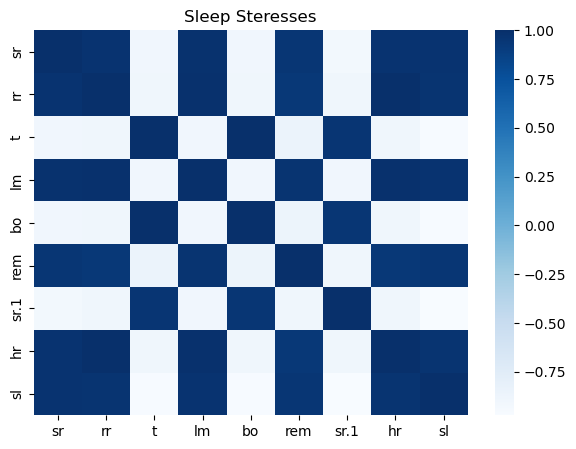

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Blues")
heatmap.set_title("Sleep Steresses")

##### 해당 히트맵 시각화 결과 모든 feature들이 서로 연관성이 있는 것을 볼 수 있었다.

In [7]:
corr[['sl']].sort_values(by="sl", ascending=False)[1:]
# 타겟 데이터 (수면 스트레스 레벨)에 대부분 모든 피처들이 영향을 미친다.

,sl
sr,0.975322
lm,0.971071
hr,0.963516
rr,0.963516
rem,0.951988
bo,-0.961092
t,-0.962354
sr.1,-0.973036


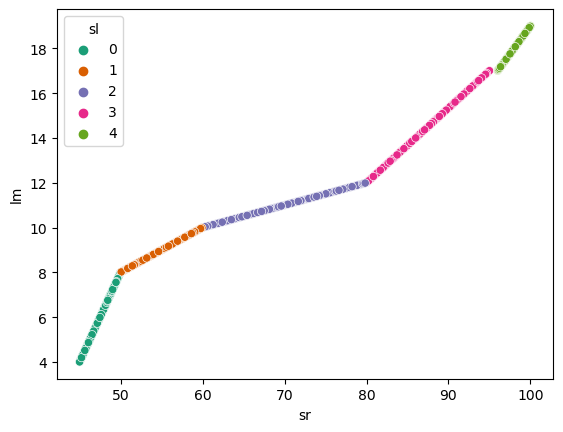

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='sr', y='lm', hue='sl', palette="Dark2", data=df)

# 그래프 표시
plt.show()




array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

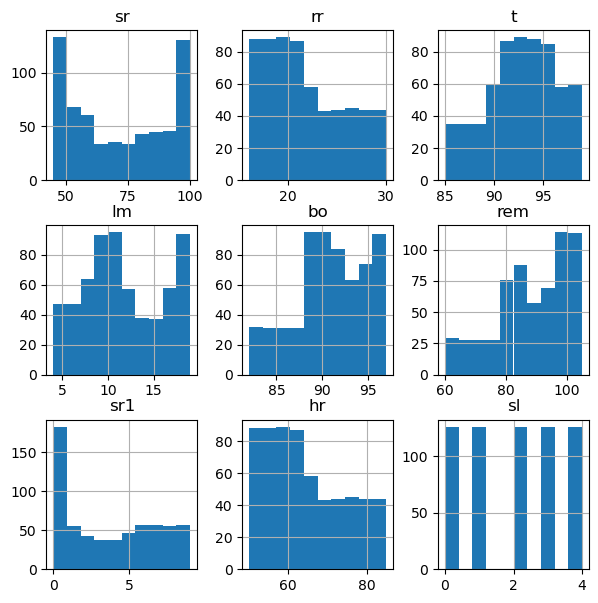

In [67]:
df.hist(figsize=(7,7))

In [9]:
from sklearn.preprocessing import StandardScaler

features = df.iloc[:, :-1]

std = StandardScaler()
std_features = std.fit_transform(features)
std_df = pd.DataFrame(std_features, columns=features.columns)


std_df['sl'] = df.sl
std_df.shape

(630, 9)

In [10]:
std_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066,3
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720,3
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206,1
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056,3
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636,0
...,...,...,...,...,...,...,...,...,...
625,-0.103319,-0.211963,0.045366,-0.172245,0.015387,0.109388,-0.085186,-0.211963,2
626,-1.196438,-1.116337,1.492534,-1.151711,1.404324,-1.240291,1.532036,-1.116337,0
627,1.338193,1.439328,-1.678534,1.408682,-1.703859,1.125855,-1.212261,1.439328,4
628,-0.669510,-0.522841,0.830194,-0.459009,0.946816,-0.351724,0.992089,-0.522841,1


In [11]:
df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [12]:
# 한번에 전체  이상치를 확인 
columns = ["sr","rr","t","lm","bo",'rem','sr.1','hr']

for column in columns :
    print(f'{column} : {std_df[~std_df[column].between(-1.96, 1.96)].shape[0]}건')

sr : 0건
rr : 14건
t : 23건
lm : 0건
bo : 27건
rem : 33건
sr.1 : 0건
hr : 14건


In [13]:
columns = ["sr","rr","t","lm","bo",'rem','sr.1','hr']

# 이상치 모두 제거 
for column in columns :
    std_df.drop(
        std_df[~std_df[column].between(-1.96, 1.96)].index,
        axis=0,
        inplace=True)

# 제거 후 결과 
for column in columns:
    print(f'{column} : {std_df[~std_df[column].between(-1.96, 1.96)].shape[0]}건')

sr : 0건
rr : 0건
t : 0건
lm : 0건
bo : 0건
rem : 0건
sr.1 : 0건
hr : 0건


In [14]:
# 인덱스 초기화 
std_df.reset_index(drop=True, inplace=True)
std_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066,3
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720,3
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206,1
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056,3
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636,0
...,...,...,...,...,...,...,...,...,...
551,-0.103319,-0.211963,0.045366,-0.172245,0.015387,0.109388,-0.085186,-0.211963,2
552,-1.196438,-1.116337,1.492534,-1.151711,1.404324,-1.240291,1.532036,-1.116337,0
553,1.338193,1.439328,-1.678534,1.408682,-1.703859,1.125855,-1.212261,1.439328,4
554,-0.669510,-0.522841,0.830194,-0.459009,0.946816,-0.351724,0.992089,-0.522841,1


In [15]:
std_df.sl.value_counts()
# 이상치를 제거했더니 sl 의 비중이 달라졌다. 다시 히트맵, 히스토그램 으로 분석해보자
# SMOTE or under sampling으로 비중을 맞추자.

sl
3    126
1    126
2    126
0     93
4     85
Name: count, dtype: int64

In [16]:
corr[['sl']].sort_values(by="sl", ascending=False)[1:]
# 타겟 데이터 (수면 스트레스 레벨)에 대부분 모든 피처들이 영향을 미친다.

,sl
sr,0.975322
lm,0.971071
hr,0.963516
rr,0.963516
rem,0.951988
bo,-0.961092
t,-0.962354
sr.1,-0.973036


Text(0.5, 1.0, 'Sleep Steresses')

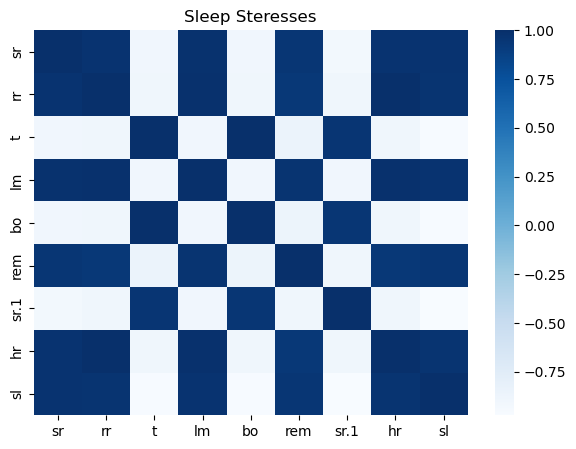

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Blues")
heatmap.set_title("Sleep Steresses")

In [18]:
df.rename(columns={'sr.1': 'sr1'}, inplace=True)

In [19]:
df

,sr,rr,t,lm,bo,rem,sr1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

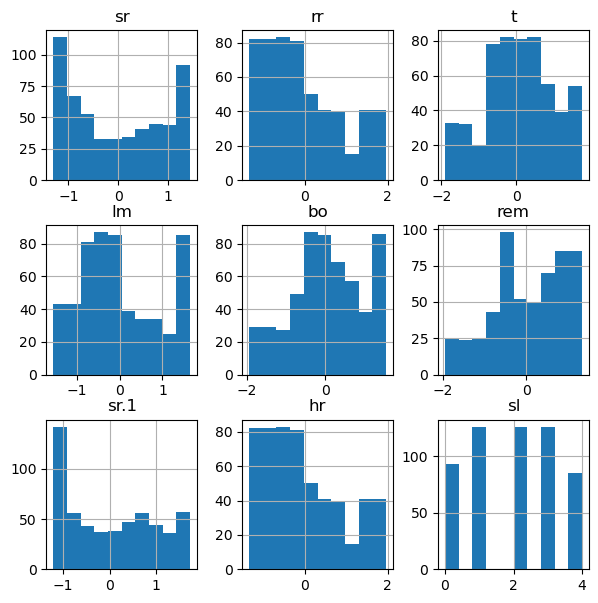

In [68]:
std_df.hist(figsize=(7,7))

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

features, targets = std_df.iloc[:,:-1], std_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()


sl
3    101
2    101
1    101
0    101
4    101
Name: count, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dtc_parameters = {'max_depth' : [5,6,7], 'min_samples_split': [10,11,12]}

svc_parameters = {'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__kernel' : ['linear', 'rbf'],
                 }
knn_parameters = {'knn__n_neighbors' : [3,5,7,9,11,55,65]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True) 
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()),('svc' , svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()),('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True)

In [23]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [10, 11, 12]},
             return_train_score=True)

In [24]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [25]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 55, 65]},
             return_train_score=True)

In [26]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(dtc_result_df)

dtc = g_dtc.best_estimator_

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.996040,3
1,"{'max_depth': 5, 'min_samples_split': 11}",0.994059,6
2,"{'max_depth': 5, 'min_samples_split': 12}",0.998020,1
3,"{'max_depth': 6, 'min_samples_split': 10}",0.994059,6
4,"{'max_depth': 6, 'min_samples_split': 11}",0.998020,1
5,"{'max_depth': 6, 'min_samples_split': 12}",0.996040,3
6,"{'max_depth': 7, 'min_samples_split': 10}",0.994059,6
7,"{'max_depth': 7, 'min_samples_split': 11}",0.994059,6
8,"{'max_depth': 7, 'min_samples_split': 12}",0.996040,3


In [27]:
from sklearn.preprocessing import StandardScaler

svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(svc_result_df['params'][4]) # linear
display(svc_result_df)

svc = SVC(C=0.001,gamma=0.1, kernel='linear', probability=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()),('svc', svc)])

svc_pipe.fit(X_train_over, y_train_over)



{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.792079,55
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.792079,55
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.792079,55
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.792079,55
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.792079,55
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",1.000000,1
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",1.000000,1
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",1.000000,1
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",1.000000,1


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.001, gamma=0.1, kernel='linear', probability=True))])

In [28]:
svc_pipe

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc',
                 SVC(C=0.001, gamma=0.1, kernel='linear', probability=True))])

In [29]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'].iloc[3])
display(knn_result_df)

knn = KNeighborsClassifier(n_neighbors=17)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

knn_pipe.fit(X_train_over, y_train_over)

{'knn__n_neighbors': 9}


,params,mean_test_score,rank_test_score
0,{'knn__n_neighbors': 3},1.0,1
1,{'knn__n_neighbors': 5},1.0,1
2,{'knn__n_neighbors': 7},1.0,1
3,{'knn__n_neighbors': 9},1.0,1
4,{'knn__n_neighbors': 11},1.0,1
5,{'knn__n_neighbors': 55},1.0,1
6,{'knn__n_neighbors': 65},1.0,1


Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=17))])

#### 로그 치환 했을 때 데이터 수치 확인 

In [30]:
from sklearn.ensemble import VotingClassifier


# vc = VotingClassifier(estimators=[('dtc', dtc), 
#                              ('svc', svc_pipe), 
#                              ('knn', knn_pipe)], 
#                  voting='hard', 
#                  n_jobs=-1)


vc = VotingClassifier(estimators=[('dtc', dtc), 
                             ('svc', svc_pipe), 
                             ('knn', knn_pipe)], 
                 voting='soft', 
                 n_jobs=-1)

In [31]:
vc.fit(X_train_over, y_train_over) # Vote 로 추출 한 결과 

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=12)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.001, gamma=0.1,
                                                   kernel='linear',
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=17))]))],
                 n_jobs=-1, voting='soft')

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [33]:
prediction = vc.predict(X_test)

오차 행렬
[[19  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 17]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


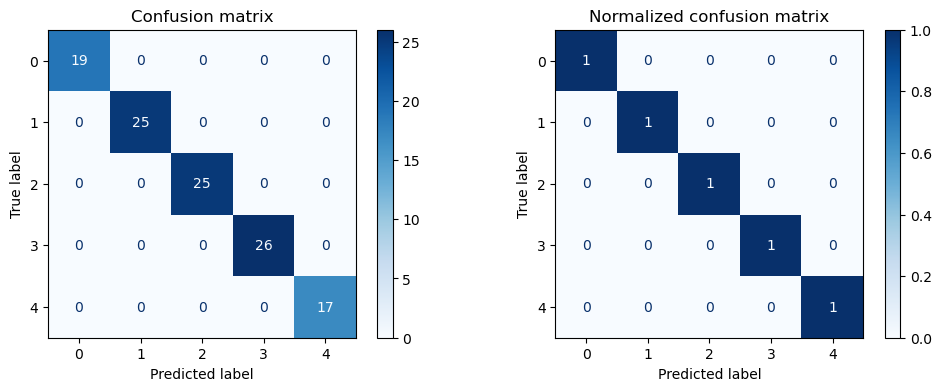

In [34]:
get_evaluation(y_test, prediction, vc, X_test)

#### Vote 방식말고 Bagging 방식으로 랜덤 포레스트를 사용해보자 

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

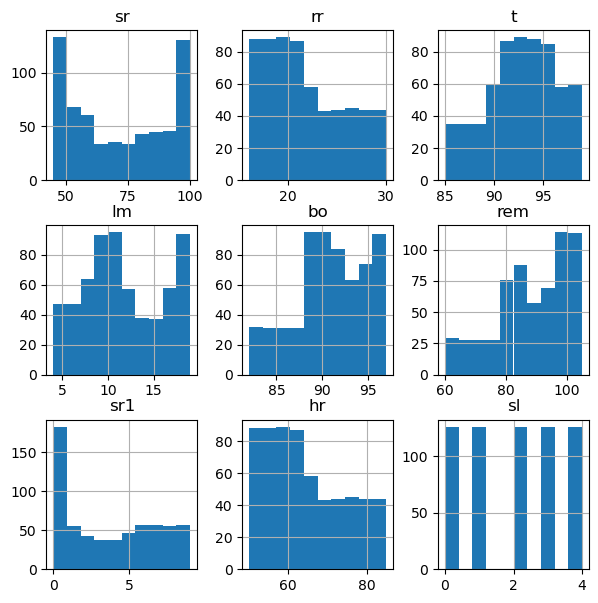

In [66]:
df.hist(figsize=(7,7))

<Axes: >

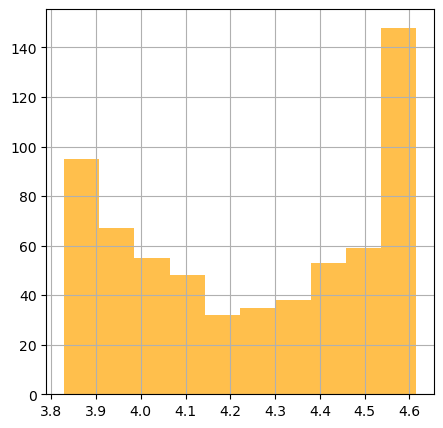

In [35]:
import numpy as np
np.log1p(df['sr']).hist(figsize=(5, 5), alpha=0.7, color="orange")

In [36]:
std_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066,3
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720,3
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206,1
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056,3
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636,0
...,...,...,...,...,...,...,...,...,...
551,-0.103319,-0.211963,0.045366,-0.172245,0.015387,0.109388,-0.085186,-0.211963,2
552,-1.196438,-1.116337,1.492534,-1.151711,1.404324,-1.240291,1.532036,-1.116337,0
553,1.338193,1.439328,-1.678534,1.408682,-1.703859,1.125855,-1.212261,1.439328,4
554,-0.669510,-0.522841,0.830194,-0.459009,0.946816,-0.351724,0.992089,-0.522841,1


In [37]:
import pandas as pd 


In [38]:
a_df = pd.read_csv('./datasets/stress_in_sleep.csv')
a_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [39]:
from sklearn.preprocessing import StandardScaler

features = a_df.iloc[:,:-1]
std = StandardScaler()
std_features = std.fit_transform(features)
std_a_df = pd.DataFrame(std_features, columns=features.columns)

std_a_df['sl'] = a_df.sl
std_a_df.shape

# 표준화 결과 
std_a_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066,3
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720,3
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206,1
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056,3
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636,0
...,...,...,...,...,...,...,...,...,...
625,-0.103319,-0.211963,0.045366,-0.172245,0.015387,0.109388,-0.085186,-0.211963,2
626,-1.196438,-1.116337,1.492534,-1.151711,1.404324,-1.240291,1.532036,-1.116337,0
627,1.338193,1.439328,-1.678534,1.408682,-1.703859,1.125855,-1.212261,1.439328,4
628,-0.669510,-0.522841,0.830194,-0.459009,0.946816,-0.351724,0.992089,-0.522841,1


In [40]:
std_a_df['sr'].value_counts()

sr
-0.599252    2
 0.433941    2
-1.115849    2
 1.146845    1
-0.805891    1
            ..
-1.181974    1
 1.109650    1
 0.818290    1
-1.250165    1
 0.119850    1
Name: count, Length: 627, dtype: int64

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

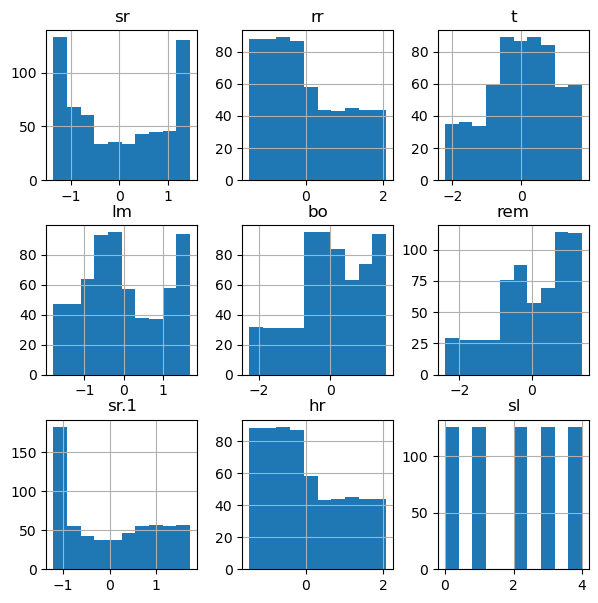

In [41]:
std_a_df.hist(figsize=(7,7))

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

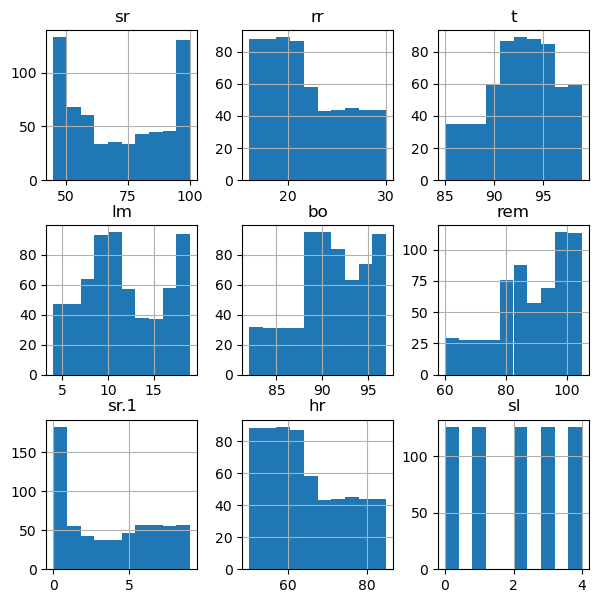

In [42]:
a_df.hist(figsize=(7,7)) # log1p 로그 치환을 사용해서 그래프

In [43]:
a_df.sl.value_counts()

sl
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

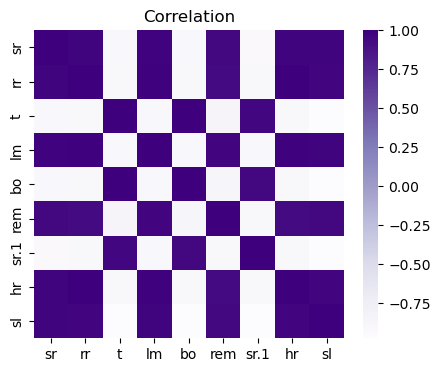

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,4))
corr = a_df.corr()
# corr <-- 가중치
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [45]:
a_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [46]:
a_df.rename(columns={'sr.1' : 'sr1'}, inplace=True)
std_a_df.rename(columns={'sr.1' : 'sr1'}, inplace=True)

In [47]:
columns = ['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr1', 'hr']

for column in columns :
    print(f'{column} : {std_a_df[~std_a_df[column].between(-1.96,1.96)].shape[0]}건')

sr : 0건
rr : 14건
t : 23건
lm : 0건
bo : 27건
rem : 33건
sr1 : 0건
hr : 14건


In [48]:
columns = ['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr1', 'hr']

for column in columns : 
    std_a_df.drop(std_a_df[~std_a_df[column].between(-1.96,1.96)].index, axis=0, inplace=True)

for column in columns :
    print(f'{column} : {std_a_df[~std_a_df[column].between(-1.96,1.96)].shape[0]}건')

sr : 0건
rr : 0건
t : 0건
lm : 0건
bo : 0건
rem : 0건
sr1 : 0건
hr : 0건


In [49]:
std_a_df.reset_index(drop=True, inplace=True)
std_a_df

,sr,rr,t,lm,bo,rem,sr1,hr,sl
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066,3
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720,3
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206,1
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056,3
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636,0
...,...,...,...,...,...,...,...,...,...
551,-0.103319,-0.211963,0.045366,-0.172245,0.015387,0.109388,-0.085186,-0.211963,2
552,-1.196438,-1.116337,1.492534,-1.151711,1.404324,-1.240291,1.532036,-1.116337,0
553,1.338193,1.439328,-1.678534,1.408682,-1.703859,1.125855,-1.212261,1.439328,4
554,-0.669510,-0.522841,0.830194,-0.459009,0.946816,-0.351724,0.992089,-0.522841,1


In [50]:
std_a_df['sl'].value_counts() # 이번엔 언더 샘플링 사용 

sl
3    126
1    126
2    126
0     93
4     85
Name: count, dtype: int64

In [51]:
sl3 =  std_a_df[std_a_df.sl == 3].sample(85, random_state=124)
sl1 = std_a_df[std_a_df.sl == 1].sample(85, random_state=124)
sl2 = std_a_df[std_a_df.sl == 2].sample(85, random_state=124)
sl0 = std_a_df[std_a_df.sl == 0].sample(85, random_state=124)

std_a_df = pd.concat([sl0,sl1,sl2,sl3]).reset_index(drop=True)

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

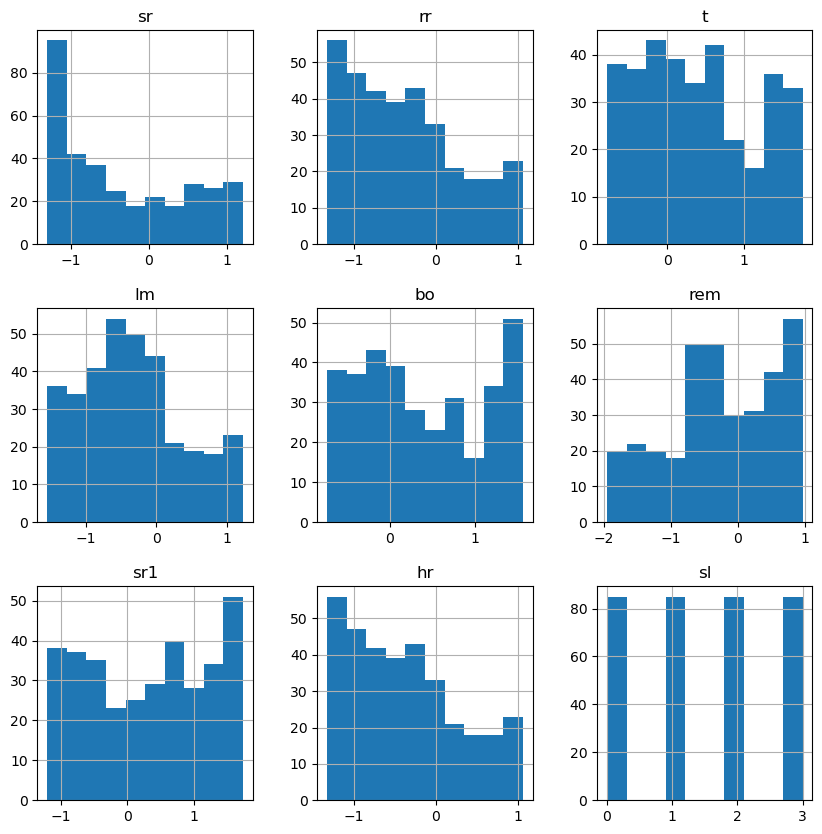

In [52]:
std_a_df.hist(figsize=(10,10))

In [53]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [11, 12, 13],
    'min_samples_split': [6, 7, 8]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = std_a_df.iloc[:, :-1], std_a_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [11, 12, 13],
                         'min_samples_split': [6, 7, 8]})

In [54]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 11, 'min_samples_split': 6}",0.992593,3
1,"{'max_depth': 11, 'min_samples_split': 7}",0.992593,3
2,"{'max_depth': 11, 'min_samples_split': 8}",0.992593,3
3,"{'max_depth': 12, 'min_samples_split': 6}",0.988889,8
4,"{'max_depth': 12, 'min_samples_split': 7}",0.992593,3
5,"{'max_depth': 12, 'min_samples_split': 8}",0.988889,8
6,"{'max_depth': 13, 'min_samples_split': 6}",0.996296,1
7,"{'max_depth': 13, 'min_samples_split': 7}",0.996296,1
8,"{'max_depth': 13, 'min_samples_split': 8}",0.992593,3


In [55]:
std_a_df
a_df

,sr,rr,t,lm,bo,rem,sr1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [57]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

오차 행렬
[[17  0  0  0]
 [ 0 17  0  0]
 [ 0  0 17  0]
 [ 0  0  0 17]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


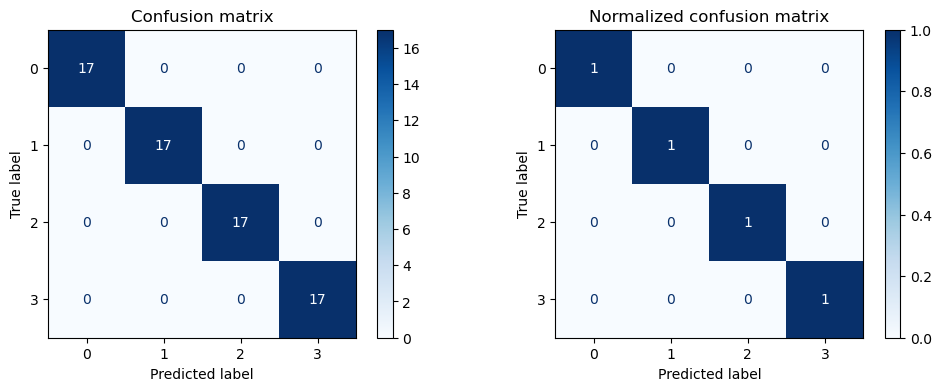

In [58]:
get_evaluation(y_test, prediction, rfc, X_test)

In [59]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(rfc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([7, 6, 5, 4, 3, 2, 1, 0], dtype=int64)

In [60]:
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

hr: 0.0
sr1: 0.0
rem: 0.0
bo: 0.0
lm: 0.0
t: 0.0
rr: 0.0
sr: 0.0


In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'rfc__max_depth': [13, 14, 15],
    'rfc__min_samples_split': [20, 21, 22, 23]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = std_a_df.iloc[:, :-1], std_a_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

rfc_pipe = Pipeline([('min_max_scaler', MinMaxScaler()), ('rfc', rfc)])

g_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=10, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('min_max_scaler', MinMaxScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [13, 14, 15],
                         'rfc__min_samples_split': [20, 21, 22, 23]})

In [62]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'rfc__max_depth': 13, 'rfc__min_samples_split...",0.996296,4
1,"{'rfc__max_depth': 13, 'rfc__min_samples_split...",0.996296,4
2,"{'rfc__max_depth': 13, 'rfc__min_samples_split...",0.996296,4
3,"{'rfc__max_depth': 13, 'rfc__min_samples_split...",0.992593,11
4,"{'rfc__max_depth': 14, 'rfc__min_samples_split...",0.992593,11
5,"{'rfc__max_depth': 14, 'rfc__min_samples_split...",1.000000,1
6,"{'rfc__max_depth': 14, 'rfc__min_samples_split...",0.996296,4
7,"{'rfc__max_depth': 14, 'rfc__min_samples_split...",0.996296,4
8,"{'rfc__max_depth': 15, 'rfc__min_samples_split...",0.996296,4
9,"{'rfc__max_depth': 15, 'rfc__min_samples_split...",0.996296,4


In [63]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

오차 행렬
[[17  0  0  0]
 [ 0 17  0  0]
 [ 0  0 17  0]
 [ 0  0  0 17]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1: 1.0000
################################################################################


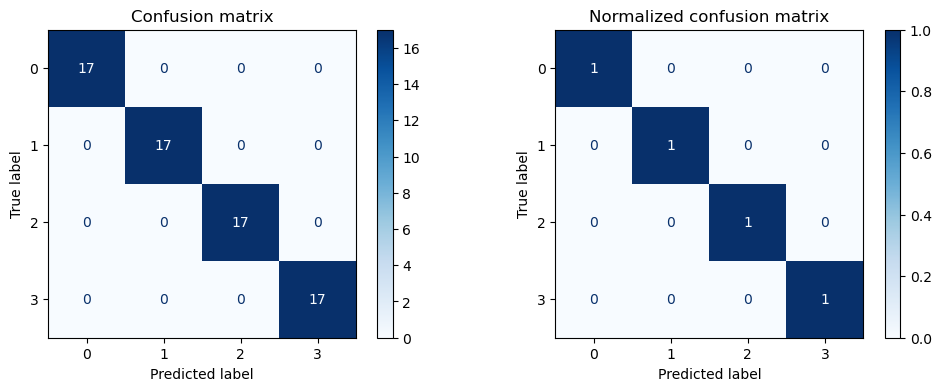

In [64]:
get_evaluation(y_test, prediction, rfc, X_test)

In [69]:
s_df = pd.read_csv('./datasets/stress_in_sleep.csv')
s_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [70]:
s_df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

array([[<Axes: title={'center': 'sr'}>, <Axes: title={'center': 'rr'}>,
        <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'lm'}>, <Axes: title={'center': 'bo'}>,
        <Axes: title={'center': 'rem'}>],
       [<Axes: title={'center': 'sr.1'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'sl'}>]], dtype=object)

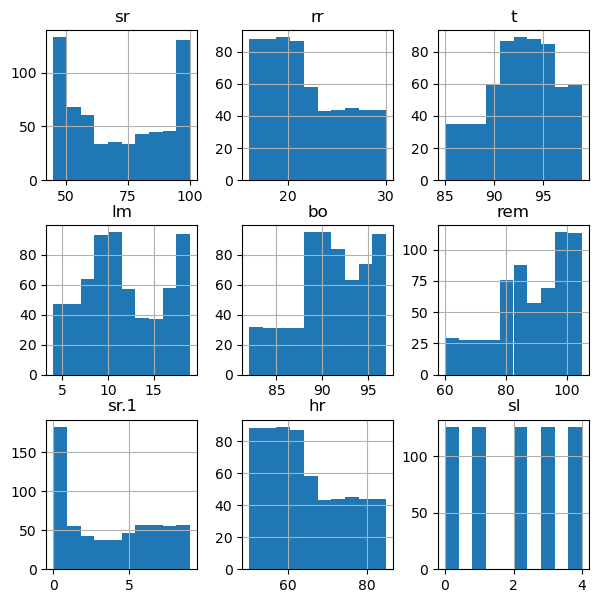

In [72]:
s_df.hist(figsize=(7,7))

<Axes: >

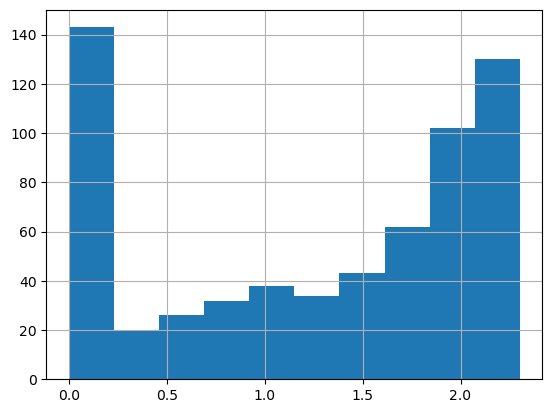

In [77]:
import numpy as np
np.log1p(s_df['sr.1']).hist()

In [81]:
corr[['sl']].sort_values(by="sl", ascending=False)[1:]

,sl
sr,0.975322
lm,0.971071
hr,0.963516
rr,0.963516
rem,0.951988
bo,-0.961092
t,-0.962354
sr.1,-0.973036


In [82]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'n_estimators' : [50, 100, 500],
    'learning_rate' : [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=3)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [83]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.3, 'n_estimators': 50}",0.988970,3
1,"{'learning_rate': 0.3, 'n_estimators': 100}",0.988970,3
2,"{'learning_rate': 0.3, 'n_estimators': 500}",0.988970,3
3,"{'learning_rate': 0.5, 'n_estimators': 50}",0.988970,3
4,"{'learning_rate': 0.5, 'n_estimators': 100}",0.988970,3
5,"{'learning_rate': 0.5, 'n_estimators': 500}",0.988970,3
6,"{'learning_rate': 0.7, 'n_estimators': 50}",0.988970,3
7,"{'learning_rate': 0.7, 'n_estimators': 100}",0.988970,3
8,"{'learning_rate': 0.7, 'n_estimators': 500}",0.988970,3
9,"{'learning_rate': 1, 'n_estimators': 50}",0.992633,2


In [84]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def gbc_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[17  0  0  0]
 [ 0 17  0  0]
 [ 0  1 16  0]
 [ 0  0  0 17]]
정확도: 0.9853, 정밀도: 0.9861, 재현율: 0.9853, F1: 0.9853
################################################################################


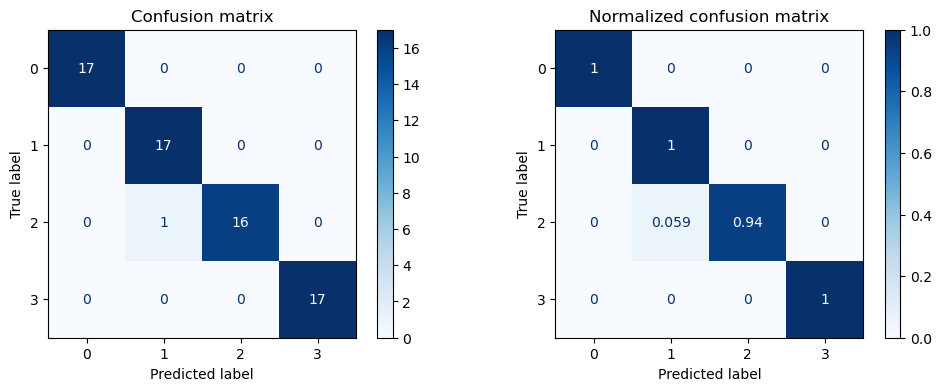

In [87]:
gbc_evaluation(y_test, prediction, gbc, X_test)

In [ ]:
#### 